In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [12]:
df = pd.read_csv("Bank_Transaction.csv")
df.head()

,TransactionID,Amount,TransactionTime,AccountAgeDays,TransactionType,Location,IsFraud
0,TXN001,500,10,120,Debit,Delhi,0
1,TXN002,1200,12,300,Credit,Mumbai,0
2,TXN003,45000,14,30,Debit,Delhi,1
3,TXN004,300,9,500,Debit,Kolkata,0
4,TXN005,750,11,420,Debit,Chennai,0


In [13]:
df.shape

(25, 7)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TransactionID    25 non-null     object
 1   Amount           25 non-null     int64 
 2   TransactionTime  25 non-null     int64 
 3   AccountAgeDays   25 non-null     int64 
 4   TransactionType  25 non-null     object
 5   Location         25 non-null     object
 6   IsFraud          25 non-null     int64 
dtypes: int64(4), object(3)
memory usage: 1.5+ KB


In [15]:
df.isnull().sum()

TransactionID      0
Amount             0
TransactionTime    0
AccountAgeDays     0
TransactionType    0
Location           0
IsFraud            0
dtype: int64

In [16]:
df['IsFraud'].value_counts()

IsFraud
0    17
1     8
Name: count, dtype: int64

In [17]:
df.head()

,TransactionID,Amount,TransactionTime,AccountAgeDays,TransactionType,Location,IsFraud
0,TXN001,500,10,120,Debit,Delhi,0
1,TXN002,1200,12,300,Credit,Mumbai,0
2,TXN003,45000,14,30,Debit,Delhi,1
3,TXN004,300,9,500,Debit,Kolkata,0
4,TXN005,750,11,420,Debit,Chennai,0


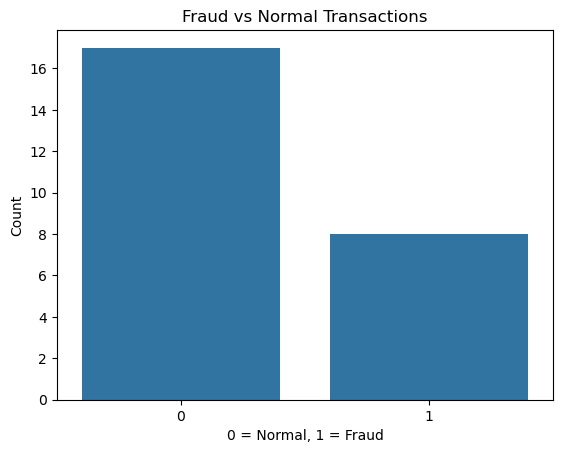

In [20]:
sns.countplot(x='IsFraud', data=df)
plt.title("Fraud vs Normal Transactions")
plt.xlabel("0 = Normal, 1 = Fraud")
plt.ylabel("Count")
plt.show()


# Transaction Amount Distribution

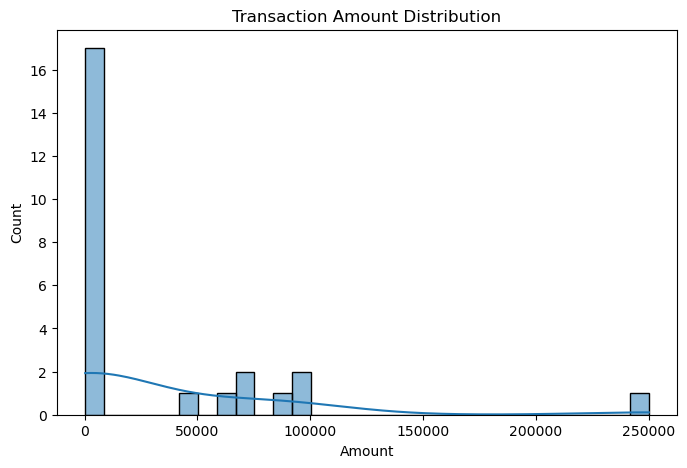

In [21]:
plt.figure(figsize=(8,5))
sns.histplot(df['Amount'], bins=30, kde=True)
plt.title("Transaction Amount Distribution")
plt.show()

# Fraud Vs Amount

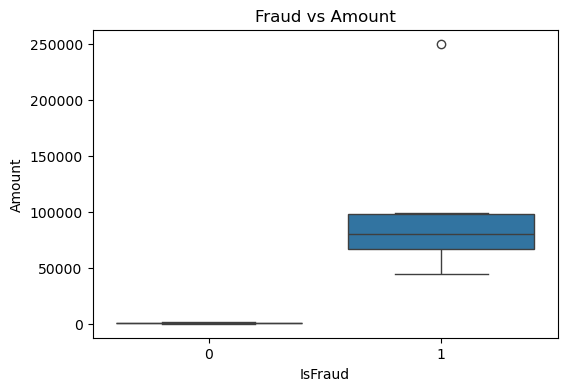

In [22]:
plt.figure(figsize=(6,4))
sns.boxplot(x='IsFraud', y='Amount', data=df)
plt.title("Fraud vs Amount")
plt.show()

In [23]:
mean_amount = df['Amount'].mean()
std_amount = df['Amount'].std()

mean_amount, std_amount

(np.float64(31968.8), 57749.56928555109)

 # Z-Score Calculation

In [24]:
df['Z_score'] = (df['Amount'] - mean_amount) / std_amount
df[['Amount', 'Z_score']].head()

,Amount,Z_score
0,500,-0.544918
1,1200,-0.532797
2,45000,0.225650
3,300,-0.548382
4,750,-0.540589


In [25]:
df.head()

,TransactionID,Amount,TransactionTime,AccountAgeDays,TransactionType,Location,IsFraud,Z_score
0,TXN001,500,10,120,Debit,Delhi,0,-0.544918
1,TXN002,1200,12,300,Credit,Mumbai,0,-0.532797
2,TXN003,45000,14,30,Debit,Delhi,1,0.225650
3,TXN004,300,9,500,Debit,Kolkata,0,-0.548382
4,TXN005,750,11,420,Debit,Chennai,0,-0.540589


# Statistical Froud Detection Logic

In [27]:
df['Stat_Fraud'] = df['Z_score'].apply(
    lambda x: 1 if abs(x)>3 else 0
)

In [28]:
pd.crosstab(df['IsFraud'], df['Stat_Fraud'],
            rownames=['Actual Fraud'],
            colnames=['Detected Fraud'])


Detected Fraud,0,1
Actual Fraud,,
0,17,0
1,7,1


In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='TransactionTime',
    y='Amount',
    hue='Stat_Fraud',
    data=df
)
plt.title("Fraud Detection using Z-Score")
plt.show()


In [31]:
fraud_location = df[df['IsFraud'] == 1]['Location'].value_counts()
fraud_location


Location
Delhi        3
Mumbai       3
Hyderabad    1
Bangalore    1
Name: count, dtype: int64

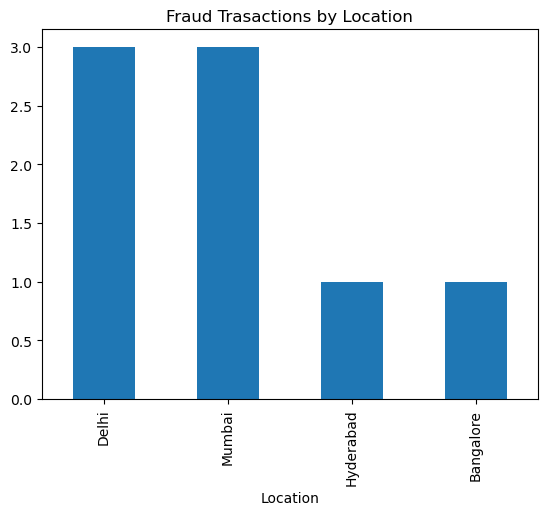

In [32]:
fraud_location.plot(kind='bar')
plt.title("Fraud Trasactions by Location")
plt.show()

In [33]:
df.to_csv("Bank_Transaction.csv", index=False)

In [34]:
df.head()

,TransactionID,Amount,TransactionTime,AccountAgeDays,TransactionType,Location,IsFraud,Z_score,Stat_Fraud
0,TXN001,500,10,120,Debit,Delhi,0,-0.544918,0
1,TXN002,1200,12,300,Credit,Mumbai,0,-0.532797,0
2,TXN003,45000,14,30,Debit,Delhi,1,0.225650,0
3,TXN004,300,9,500,Debit,Kolkata,0,-0.548382,0
4,TXN005,750,11,420,Debit,Chennai,0,-0.540589,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    25 non-null     object 
 1   Amount           25 non-null     int64  
 2   TransactionTime  25 non-null     int64  
 3   AccountAgeDays   25 non-null     int64  
 4   TransactionType  25 non-null     object 
 5   Location         25 non-null     object 
 6   IsFraud          25 non-null     int64  
 7   Z_score          25 non-null     float64
 8   Stat_Fraud       25 non-null     int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 1.9+ KB


In [36]:
city_stats = df.groupby("Location")["Amount"].agg(
    City_Mean="mean",
    City_Std="std"
).reset_index()

city_stats


,Location,City_Mean,City_Std
0,Bangalore,33933.333333,56355.064842
1,Chennai,916.666667,332.916406
2,Delhi,61586.666667,96906.413960
3,Hyderabad,34050.000000,46598.336880
4,Jaipur,350.000000,NaN
5,Kolkata,600.000000,424.264069
6,Lucknow,1800.000000,NaN
7,Mumbai,63050.000000,43486.511319
8,Patna,650.000000,NaN
9,Pune,425.000000,35.355339


In [38]:
df = df.merge(city_stats, on="Location", how="left")
df.head()


,TransactionID,Amount,TransactionTime,AccountAgeDays,TransactionType,Location,IsFraud,Z_score,Stat_Fraud,City_Mean,City_Std
0,TXN001,500,10,120,Debit,Delhi,0,-0.544918,0,61586.666667,96906.413960
1,TXN002,1200,12,300,Credit,Mumbai,0,-0.532797,0,63050.000000,43486.511319
2,TXN003,45000,14,30,Debit,Delhi,1,0.225650,0,61586.666667,96906.413960
3,TXN004,300,9,500,Debit,Kolkata,0,-0.548382,0,600.000000,424.264069
4,TXN005,750,11,420,Debit,Chennai,0,-0.540589,0,916.666667,332.916406


In [ ]:
df['City_Z_Score'] = (df['Amount'] - df['City_Mean']) / df['City_Std']
df[['Location', 'Amount', 'City_Z_Score']].head()


# city - wise Fraud Detection

In [40]:
df['City_Fraud'] = df['City_Z_Score'].apply(
    lambda x: 1 if abs(x) > 3 else 0
)


In [41]:
pd.crosstab(df['Stat_Fraud'], df['City_Fraud'],
            rownames=["Global Z Fraud"],
            colnames=["City-wise Fraud"])


City-wise Fraud,0
Global Z Fraud,
0,24
1,1


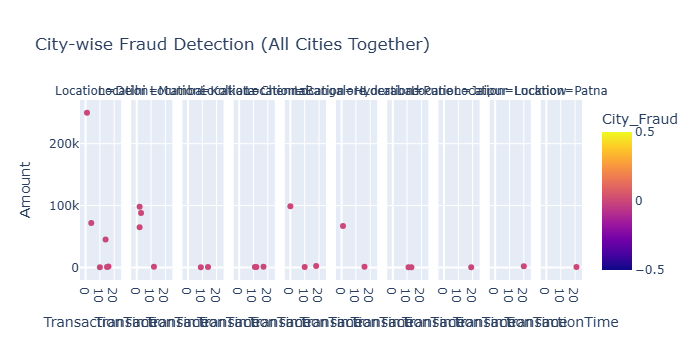

In [43]:
fig = px.scatter(
    df,
    x="TransactionTime",
    y="Amount",
    color="City_Fraud",
    facet_col="Location",
    hover_data=["TransactionID", "City_Z_Score"],
    title="City-wise Fraud Detection (All Cities Together)"
)

fig.show()


# City - wise Fraud Percentage

In [44]:
city_fraud_rate = df.groupby("Location")["City_Fraud"].mean().reset_index()
city_fraud_rate['Fraud_Percentage'] = city_fraud_rate['City_Fraud'] * 100
city_fraud_rate


,Location,City_Fraud,Fraud_Percentage
0,Bangalore,0.0,0.0
1,Chennai,0.0,0.0
2,Delhi,0.0,0.0
3,Hyderabad,0.0,0.0
4,Jaipur,0.0,0.0
5,Kolkata,0.0,0.0
6,Lucknow,0.0,0.0
7,Mumbai,0.0,0.0
8,Patna,0.0,0.0
9,Pune,0.0,0.0


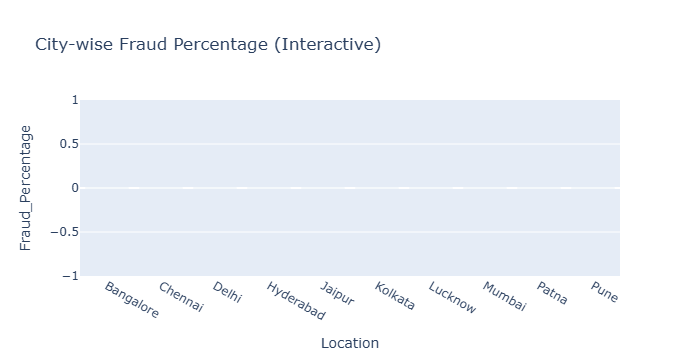

In [45]:
fig = px.bar(
    city_fraud_rate,
    x="Location",
    y="Fraud_Percentage",
    title="City-wise Fraud Percentage (Interactive)",
    text="Fraud_Percentage"
)

fig.show()


In [46]:
city_population = {
    "Delhi": 32000000,
    "Mumbai": 21000000,
    "Bangalore": 13000000,
    "Chennai": 11000000,
    "Hyderabad": 10000000,
    "Kolkata": 15000000,
    "Pune": 8000000,
    "Patna": 7000000,
    "Jaipur": 4000000,
    "Lucknow": 3500000
}


In [47]:
df['City_Population'] = df['Location'].map(city_population)
df[['Location', 'City_Population']].head()


,Location,City_Population
0,Delhi,32000000
1,Mumbai,21000000
2,Delhi,32000000
3,Kolkata,15000000
4,Chennai,11000000


In [48]:
df['City_Population'].isnull().sum()

np.int64(0)

In [49]:
df.head()

,TransactionID,Amount,TransactionTime,AccountAgeDays,TransactionType,Location,IsFraud,Z_score,Stat_Fraud,City_Mean,City_Std,City_Z_Score,City_Fraud,City_Population
0,TXN001,500,10,120,Debit,Delhi,0,-0.544918,0,61586.666667,96906.413960,-0.630368,0,32000000
1,TXN002,1200,12,300,Credit,Mumbai,0,-0.532797,0,63050.000000,43486.511319,-1.422280,0,21000000
2,TXN003,45000,14,30,Debit,Delhi,1,0.225650,0,61586.666667,96906.413960,-0.171162,0,32000000
3,TXN004,300,9,500,Debit,Kolkata,0,-0.548382,0,600.000000,424.264069,-0.707107,0,15000000
4,TXN005,750,11,420,Debit,Chennai,0,-0.540589,0,916.666667,332.916406,-0.500626,0,11000000


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    25 non-null     object 
 1   Amount           25 non-null     int64  
 2   TransactionTime  25 non-null     int64  
 3   AccountAgeDays   25 non-null     int64  
 4   TransactionType  25 non-null     object 
 5   Location         25 non-null     object 
 6   IsFraud          25 non-null     int64  
 7   Z_score          25 non-null     float64
 8   Stat_Fraud       25 non-null     int64  
 9   City_Mean        25 non-null     float64
 10  City_Std         22 non-null     float64
 11  City_Z_Score     22 non-null     float64
 12  City_Fraud       25 non-null     int64  
 13  City_Population  25 non-null     int64  
dtypes: float64(4), int64(7), object(3)
memory usage: 2.9+ KB


In [53]:
df.shape

(25, 14)

In [55]:
city_fraud_count = df.groupby("Location")["IsFraud"].sum().reset_index()
city_fraud_count


,Location,IsFraud
0,Bangalore,1
1,Chennai,0
2,Delhi,3
3,Hyderabad,1
4,Jaipur,0
5,Kolkata,0
6,Lucknow,0
7,Mumbai,3
8,Patna,0
9,Pune,0


# Fraud Rate per 1 Million People 

In [56]:
city_fraud_count = city_fraud_count.merge(
    df[['Location', 'City_Population']].drop_duplicates(),
    on="Location",
    how="left"
)

city_fraud_count['Fraud_per_Million'] = (
    city_fraud_count['IsFraud'] / city_fraud_count['City_Population']
) * 1_000_000

city_fraud_count


,Location,IsFraud,City_Population,Fraud_per_Million
0,Bangalore,1,13000000,0.076923
1,Chennai,0,11000000,0.000000
2,Delhi,3,32000000,0.093750
3,Hyderabad,1,10000000,0.100000
4,Jaipur,0,4000000,0.000000
5,Kolkata,0,15000000,0.000000
6,Lucknow,0,3500000,0.000000
7,Mumbai,3,21000000,0.142857
8,Patna,0,7000000,0.000000
9,Pune,0,8000000,0.000000


# Interctive population-based visualization

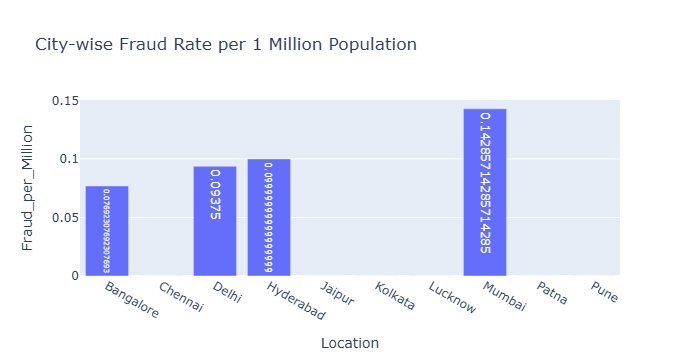

In [58]:
fig = px.bar(
    city_fraud_count,
    x="Location",
    y="Fraud_per_Million",
    title="City-wise Fraud Rate per 1 Million Population",
    text="Fraud_per_Million",
    hover_data=["City_Population"]
)

fig.show()


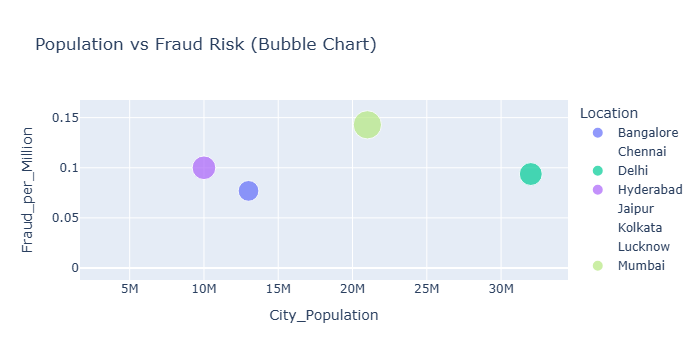

In [59]:
fig = px.scatter(
    city_fraud_count,
    x="City_Population",
    y="Fraud_per_Million",
    size="Fraud_per_Million",
    color="Location",
    title="Population vs Fraud Risk (Bubble Chart)"
)

fig.show()


# Risk Score Calculation

In [60]:
max_fraud = city_fraud_count['Fraud_per_Million'].max()

city_fraud_count['City_Risk_Score'] = (
    city_fraud_count['Fraud_per_Million'] / max_fraud
) * 100

city_fraud_count


,Location,IsFraud,City_Population,Fraud_per_Million,City_Risk_Score
0,Bangalore,1,13000000,0.076923,53.846154
1,Chennai,0,11000000,0.000000,0.000000
2,Delhi,3,32000000,0.093750,65.625000
3,Hyderabad,1,10000000,0.100000,70.000000
4,Jaipur,0,4000000,0.000000,0.000000
5,Kolkata,0,15000000,0.000000,0.000000
6,Lucknow,0,3500000,0.000000,0.000000
7,Mumbai,3,21000000,0.142857,100.000000
8,Patna,0,7000000,0.000000,0.000000
9,Pune,0,8000000,0.000000,0.000000


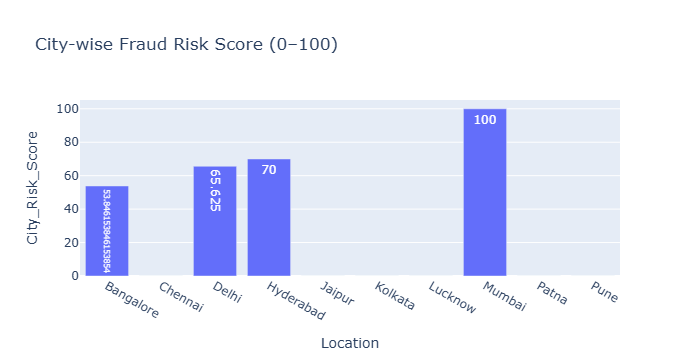

In [61]:
fig = px.bar(
    city_fraud_count,
    x="Location",
    y="City_Risk_Score",
    title="City-wise Fraud Risk Score (0–100)",
    text="City_Risk_Score"
)

fig.show()


# Night Transaction flag

In [62]:
df['Is_Night'] = df['TransactionTime'].apply(
    lambda x: 1 if (x >= 0 and x <= 5) else 0
)

df[['TransactionTime', 'Is_Night']].head()


,TransactionTime,Is_Night
0,10,0
1,12,0
2,14,0
3,9,0
4,11,0


In [63]:
pd.crosstab(df['Is_Night'], df['IsFraud'],
            rownames=['Night Transaction'],
            colnames=['Is Fraud'])


Is Fraud,0,1
Night Transaction,,
0,17,1
1,0,7


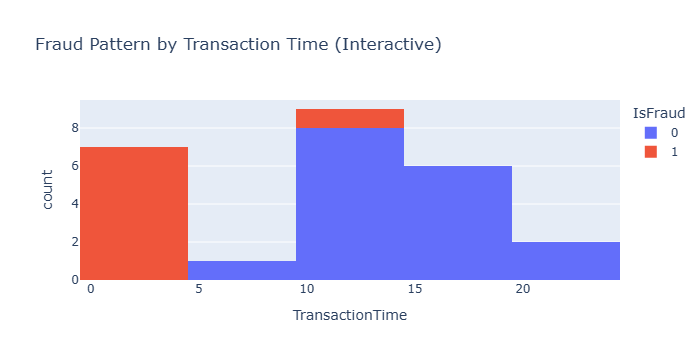

In [64]:
fig = px.histogram(
    df,
    x="TransactionTime",
    color="IsFraud",
    title="Fraud Pattern by Transaction Time (Interactive)"
)

fig.show()


In [65]:
df['Account_Risk'] = pd.cut(
    df['AccountAgeDays'],
    bins=[0, 30, 180, 10000],
    labels=['High Risk', 'Medium Risk', 'Low Risk']
)

df[['AccountAgeDays', 'Account_Risk']].head()


,AccountAgeDays,Account_Risk
0,120,Medium Risk
1,300,Low Risk
2,30,High Risk
3,500,Low Risk
4,420,Low Risk


In [66]:
pd.crosstab(df['Account_Risk'], df['IsFraud'])


IsFraud,0,1
Account_Risk,,
High Risk,0,8
Medium Risk,1,0
Low Risk,16,0


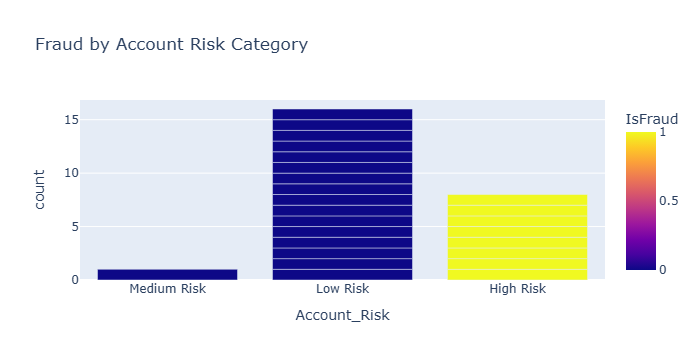

In [67]:
fig = px.bar(
    df,
    x="Account_Risk",
    color="IsFraud",
    title="Fraud by Account Risk Category"
)

fig.show()


In [70]:
df.head()

,TransactionID,Amount,TransactionTime,AccountAgeDays,TransactionType,Location,IsFraud,Z_score,Stat_Fraud,City_Mean,City_Std,City_Z_Score,City_Fraud,City_Population,Is_Night,Account_Risk
0,TXN001,500,10,120,Debit,Delhi,0,-0.544918,0,61586.666667,96906.413960,-0.630368,0,32000000,0,Medium Risk
1,TXN002,1200,12,300,Credit,Mumbai,0,-0.532797,0,63050.000000,43486.511319,-1.422280,0,21000000,0,Low Risk
2,TXN003,45000,14,30,Debit,Delhi,1,0.225650,0,61586.666667,96906.413960,-0.171162,0,32000000,0,High Risk
3,TXN004,300,9,500,Debit,Kolkata,0,-0.548382,0,600.000000,424.264069,-0.707107,0,15000000,0,Low Risk
4,TXN005,750,11,420,Debit,Chennai,0,-0.540589,0,916.666667,332.916406,-0.500626,0,11000000,0,Low Risk


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   TransactionID    25 non-null     object  
 1   Amount           25 non-null     int64   
 2   TransactionTime  25 non-null     int64   
 3   AccountAgeDays   25 non-null     int64   
 4   TransactionType  25 non-null     object  
 5   Location         25 non-null     object  
 6   IsFraud          25 non-null     int64   
 7   Z_score          25 non-null     float64 
 8   Stat_Fraud       25 non-null     int64   
 9   City_Mean        25 non-null     float64 
 10  City_Std         22 non-null     float64 
 11  City_Z_Score     22 non-null     float64 
 12  City_Fraud       25 non-null     int64   
 13  City_Population  25 non-null     int64   
 14  Is_Night         25 non-null     int64   
 15  Account_Risk     25 non-null     category
dtypes: category(1), float64(4), int64(8), object(3

In [72]:
df.isnull().sum()

TransactionID      0
Amount             0
TransactionTime    0
AccountAgeDays     0
TransactionType    0
Location           0
IsFraud            0
Z_score            0
Stat_Fraud         0
City_Mean          0
City_Std           3
City_Z_Score       3
City_Fraud         0
City_Population    0
Is_Night           0
Account_Risk       0
dtype: int64